# 라이브러리와 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [2]:
name_type = pd.read_csv("/Users/jahyeon_gu/Downloads/pokemon.csv")
name_type

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [3]:
# 이름순 정렬
# drop=True : 새로운 인덱스 컬럼을 만들지 않음
name_type = name_type.sort_values("Name").reset_index(drop=True)
name_type[:5]

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost


## 이미지 경로 & 출력

In [4]:
PATH = "/Users/jahyeon_gu/Downloads"

In [5]:
img_paths = glob.glob(PATH + "/images/*")
img_paths.sort()

In [33]:
img_paths[:5]

['/Users/jahyeon_gu/Downloads/images/abomasnow.png',
 '/Users/jahyeon_gu/Downloads/images/abra.png',
 '/Users/jahyeon_gu/Downloads/images/absol.png',
 '/Users/jahyeon_gu/Downloads/images/accelgor.png',
 '/Users/jahyeon_gu/Downloads/images/aegislash-blade.png']

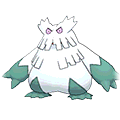

In [7]:
# png 파일
# 투명한 배경
from PIL import Image

Image.open(img_paths[0])

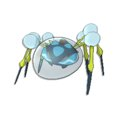

In [31]:
# jpg 파일
# 하얀 배경
Image.open(img_paths[16])

# 전처리 : y 생성

In [8]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

In [9]:
name_type["Type1"]

0        Grass
1      Psychic
2         Dark
3          Bug
4        Steel
        ...   
804       Dark
805       Dark
806     Poison
807       Dark
808     Dragon
Name: Type1, Length: 809, dtype: object

In [10]:
name_type["Type1"].nunique()

18

In [11]:
enc_y = encoder.fit_transform(name_type["Type1"])
enc_y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [12]:
enc_y.shape

(809, 18)

In [13]:
enc_y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
np.argmax(enc_y[0])

9

In [15]:
encoder.classes_[np.argmax(enc_y[0])]

'Grass'

In [16]:
y = []

for i in enc_y:
    max_idx = np.argmax(i)
    # print(max_idx)
    y.append(max_idx)

In [17]:
y = np.array(y)
y

array([ 9, 14,  1,  0, 16, 15, 16, 12, 14, 17,  2, 15, 12,  9,  3, 15, 17,
       13,  6, 12, 15, 15,  0, 15,  4, 16, 11, 12, 15, 11,  2, 14, 17, 12,
        2, 10,  8, 15, 17, 17, 15,  9, 11,  0,  0, 14, 16,  9,  9, 11, 12,
       12, 12, 15,  1,  6, 17,  6, 12,  3, 15, 15, 12,  9,  6, 12,  9, 17,
       16, 16, 17,  9, 17,  9, 12, 12,  0,  0,  0,  9,  9,  6, 15,  9, 17,
       17,  0, 12,  0, 14, 16,  8, 12,  6,  0,  6,  6, 12,  9,  9,  9,  9,
        9,  6, 14, 17, 14, 12, 17, 17, 17, 10,  4,  4,  4, 17, 16,  8,  0,
        6,  4,  5, 17, 17, 14, 14,  9,  5,  5, 15, 15, 17, 14, 13, 13, 17,
        0, 11, 11, 10,  0,  6,  1,  6,  9,  6,  9,  3, 12,  1, 12, 11,  6,
       14, 17, 17, 17,  8, 16, 15, 12, 10, 12, 12, 12, 10, 16, 13,  2,  2,
       12, 13,  2,  8,  8, 10, 14,  2, 17, 10, 12, 14,  0,  8,  8,  8,  0,
        0,  3,  3, 12, 13,  3,  3,  3,  3,  3, 14,  6,  3, 17,  6,  0, 14,
       14, 10,  9,  9, 12, 12, 12, 17,  6, 17,  9,  9, 17,  3,  4,  6,  6,
       12, 17,  4,  4, 10

In [18]:
encoder.classes_

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype='<U8')

In [19]:
len(encoder.classes_)

18

# 전처리 : X

In [21]:
import cv2

cv2.imread(img_paths[0]).shape

(120, 120, 3)

In [22]:
# png 파일
# 투명한 배경 = 0
cv2.imread(img_paths[0])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [30]:
# jpg 파일
# 하얀 배경 = 255
cv2.imread(img_paths[16])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [36]:
a = (cv2.imread(img_paths[16]) + 1)

In [41]:
# 픽셀 값에 대하여 +1
cv2.imread(img_paths[16]) + 1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

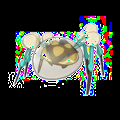

In [37]:
# +1 로는 원하는 전처리가 되지 않음
Image.fromarray(a)

## jpg to png convert library

In [44]:
# # test
# from PIL import Image

# im = Image.open(img_paths[16]).convert("RGB")
# im.save(f"{img_paths[16]}.png", "png")

In [64]:
a = cv2.imread("/Users/jahyeon_gu/Downloads/images/araquanid.jpg")

In [61]:
a

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## agumentation

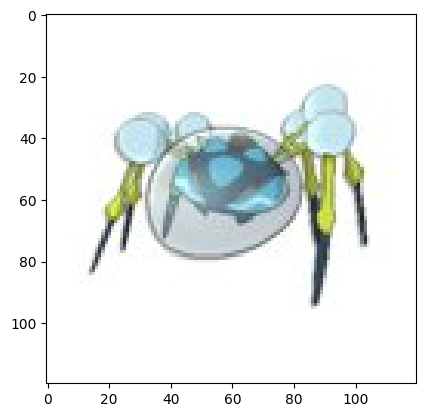

In [72]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image = cv2.cvtColor(cv2.imread(img_paths[16]), cv2.COLOR_BGR2RGB)
plt.imshow(image)

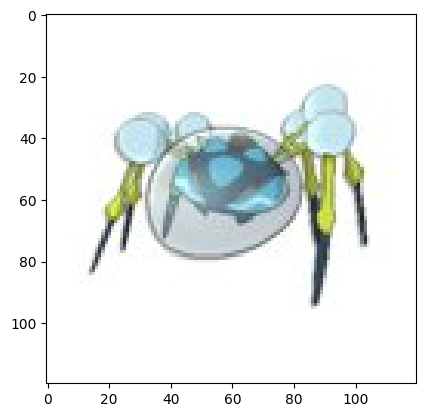

In [76]:
plt.imshow(image / 255)

In [77]:
np.min(cv2.imread(img_paths[0]) / 255), np.max(cv2.imread(img_paths[0]) / 255)

(0.0, 1.0)

In [260]:
from tqdm import tqdm

X = []

for img_path in tqdm(img_paths):
    # cv2.imread는 이미지를 RGB가 아닌 BGR로 받아오기 때문에 바꿔 주어야 함
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (120, 120))
    X.append(image)

100%|██████████| 809/809 [00:00<00:00, 3924.29it/s]


In [261]:
len(X)

809

In [262]:
len(y)

809

In [263]:
type(X[0])

numpy.ndarray

In [264]:
test = X[16]
test

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [265]:
np.min(test), np.max(test), np.mean(test)

(0, 255, 235.60347222222222)

In [266]:
a = cv2.imread(img_paths[-1])
a

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

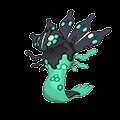

In [267]:
Image.fromarray(a)

In [287]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [288]:
type(x_test)

list

In [289]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [290]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((647, 120, 120, 3), (647,), (162, 120, 120, 3), (162,))

In [291]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation

data_augmentation = Sequential(
    [
        RandomFlip("horizontal", input_shape=(120, 120, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1)
    ]
)

In [292]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling


model = Sequential()
# 입력층
model.add(data_augmentation)
# To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.
# To rescale an input in the [0, 255] range to be in the [-1, 1] range, you would pass scale=1./127.5, offset=-1.
model.add(Rescaling(scale=1./255.))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='selu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='selu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Fully-connected layer

# 출력층
model.add(Flatten())
model.add(Dense(units=128, activation="selu"))
model.add(Dense(units=64, activation="selu"))
model.add(Dense(units=32, activation="selu"))
model.add(Dense(len(encoder.classes_), activation="softmax"))

In [293]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 120, 120, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 120, 120, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 59, 59, 16)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 59, 59, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 57, 57, 16)        2320      
                                                     

In [294]:
from tensorflow.keras.utils import plot_model

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [295]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [296]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=2)

In [297]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=early_stop)

Epoch 1/10


/Users/jahyeon_gu/tensorflow3.8/envs/tf-cert/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


InvalidArgumentError: Cannot assign a device for operation sequential_22/sequential_21/random_rotation_6/stateful_uniform/RngReadAndSkip: Could not satisfy explicit device specification '' because the node {{colocation_node sequential_22/sequential_21/random_rotation_6/stateful_uniform/RngReadAndSkip}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
RngReadAndSkip: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  sequential_22_sequential_21_random_rotation_6_stateful_uniform_rngreadandskip_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  sequential_22/sequential_21/random_rotation_6/stateful_uniform/RngReadAndSkip (RngReadAndSkip) 

	 [[{{node sequential_22/sequential_21/random_rotation_6/stateful_uniform/RngReadAndSkip}}]] [Op:__inference_train_function_21406]

In [246]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,3.051691,0.148377,3.097259,0.148148
1,2.220290,0.313756,3.373696,0.030864
2,1.663070,0.545595,3.471775,0.104938


<AxesSubplot: >

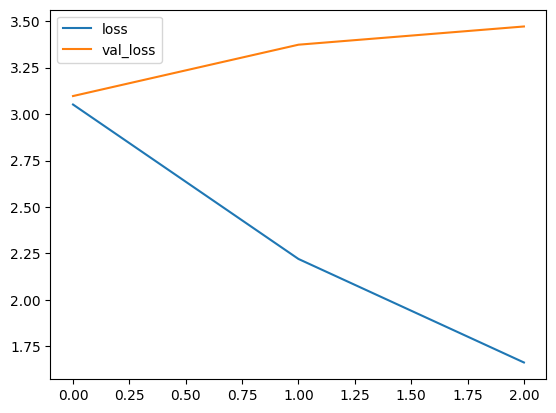

In [247]:
df_hist[["loss", "val_loss"]].plot()

<AxesSubplot: >

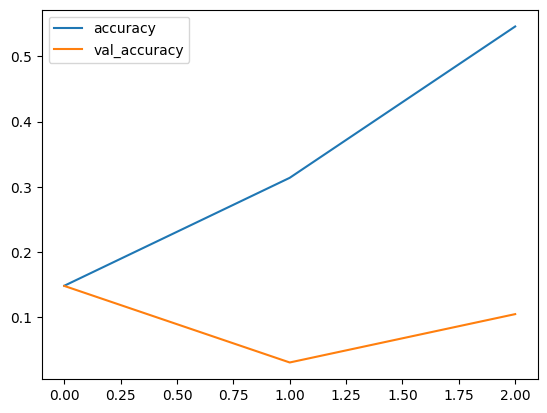

In [248]:
df_hist[["accuracy", "val_accuracy"]].plot()

# 여기서부터 노트북 참고....

In [298]:
import os
import numpy as np
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt

In [302]:
from PIL import Image

root_dir = "/Users/jahyeon_gu/Downloads/images"
files = os.path.join(root_dir)
print(root_dir)
print(files)

/Users/jahyeon_gu/Downloads/images
/Users/jahyeon_gu/Downloads/images


In [304]:
File_names = os.listdir(files)
File_names[:5]

['parasect.png', 'lumineon.png', 'raikou.png', 'comfey.jpg', 'dedenne.png']

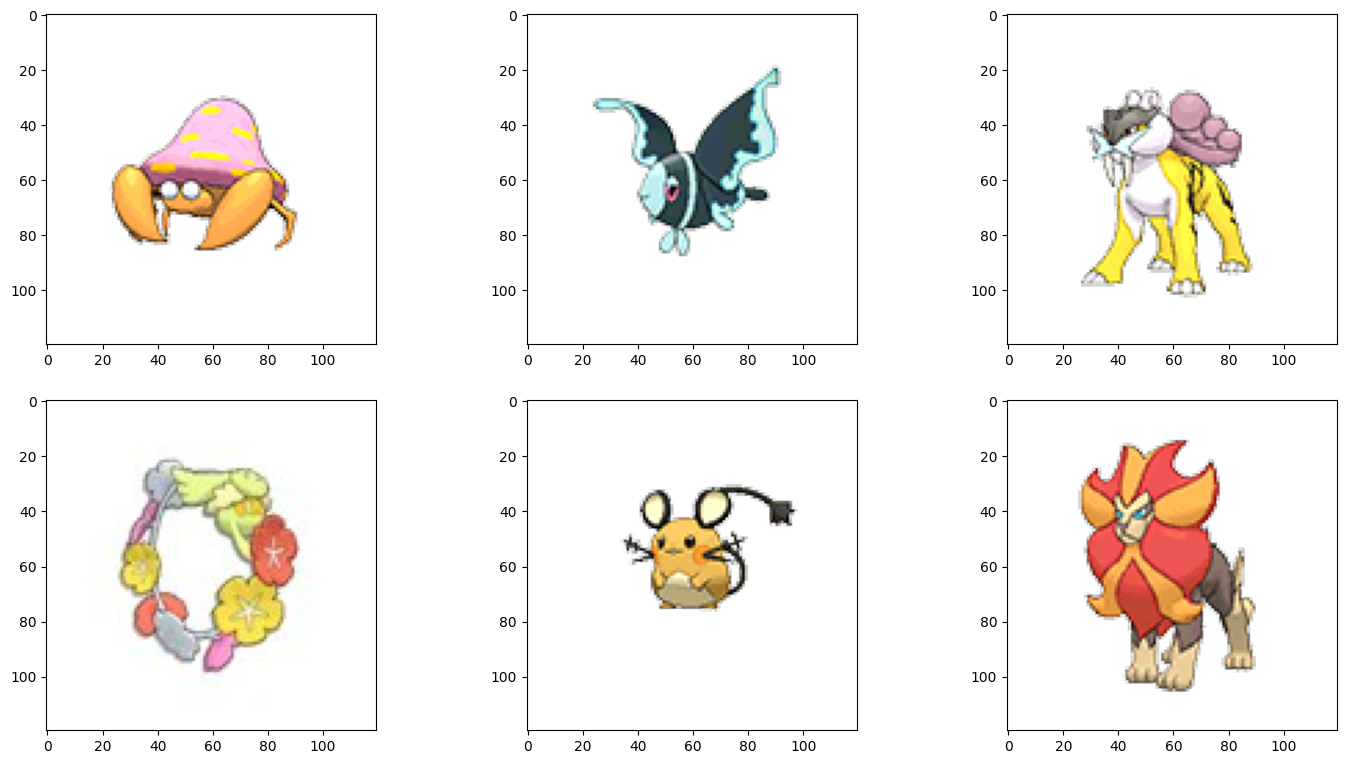

In [334]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# 5개의 파일 이름 추출
first_five = File_names[0:7]

def subplots():
    i = 0
    j = 0
    k = 0
    for k in range(6):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        # subplots 자리 조정
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    # subplot들 간의 사이 간격 조정
    plt.tight_layout(pad=2);
    
subplots()

In [313]:
data = pd.read_csv("/Users/jahyeon_gu/Downloads/pokemon.csv")

data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [319]:
# Type1을 label로 사용할 것
# 이름과 Type1을 추출하여 답안지(data_dict) 생성
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val

for item in data_dict.items():
    print(item)

('bulbasaur', 'Grass')
('ivysaur', 'Grass')
('venusaur', 'Grass')
('charmander', 'Fire')
('charmeleon', 'Fire')
('charizard', 'Fire')
('squirtle', 'Water')
('wartortle', 'Water')
('blastoise', 'Water')
('caterpie', 'Bug')
('metapod', 'Bug')
('butterfree', 'Bug')
('weedle', 'Bug')
('kakuna', 'Bug')
('beedrill', 'Bug')
('pidgey', 'Normal')
('pidgeotto', 'Normal')
('pidgeot', 'Normal')
('rattata', 'Normal')
('raticate', 'Normal')
('spearow', 'Normal')
('fearow', 'Normal')
('ekans', 'Poison')
('arbok', 'Poison')
('pikachu', 'Electric')
('raichu', 'Electric')
('sandshrew', 'Ground')
('sandslash', 'Ground')
('nidoran-f', 'Poison')
('nidorina', 'Poison')
('nidoqueen', 'Poison')
('nidoran-m', 'Poison')
('nidorino', 'Poison')
('nidoking', 'Poison')
('clefairy', 'Fairy')
('clefable', 'Fairy')
('vulpix', 'Fire')
('ninetales', 'Fire')
('jigglypuff', 'Normal')
('wigglytuff', 'Normal')
('zubat', 'Poison')
('golbat', 'Poison')
('oddish', 'Grass')
('gloom', 'Grass')
('vileplume', 'Grass')
('paras', 'B

In [320]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [321]:
# label을 encoding하기 위한 코드
# 총 18개의 label
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [326]:
final_images = []
final_labels = []
count = 0

for file in File_names:
    count += 1

    # 이미지 경로에 하나씩 접근, 색상 변경
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 

    # 파일 이름에서 포켓몬 이름을 추출, 정답지에서 label에 접근
    label = labels_idx[data_dict[file.split(".")[0]]] 

    # 추출된 값을 각각 추가
    final_images.append(np.array(img))
    final_labels.append(np.array(label))
    
# list를 np.array로 변경하고 색상값 0~1사이 값으로 정규화
final_images = np.array(final_images, dtype = np.float32)/255.0

# label값 타입 변경 & list를 np.array로 변경
final_labels = np.array(final_labels, dtype = np.int8)

In [327]:
final_images.shape, final_labels.shape

((810, 120, 120, 3), (810,))

In [340]:
# 모델 구현
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


model = tf.keras.Sequential([
    # 입력층
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),

    # 은닉층
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # 출력층
    tf.keras.layers.Dense(18)
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 43200)             0         
                                                                 
 dense_64 (Dense)            (None, 100)               4320100   
                                                                 
 dense_65 (Dense)            (None, 100)               10100     
                                                                 
 dense_66 (Dense)            (None, 100)               10100     
                                                                 
 dense_67 (Dense)            (None, 18)                1818      
                                                                 
Total params: 4,342,118
Trainable params: 4,342,118
Non-trainable params: 0
_________________________________________________________________


In [341]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [342]:
# 학습
history = model.fit(final_images, final_labels, epochs=50, validation_split=0.2)

Epoch 1/50
 1/21 [>.............................] - ETA: 18s - loss: 2.9101 - accuracy: 0.0312

2022-12-12 01:14:39.198499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 33ms/step - loss: 4.6007 - accuracy: 0.1219 - val_loss: 4.1126 - val_accuracy: 0.0741
Epoch 2/50
 1/21 [>.............................] - ETA: 0s - loss: 6.7647 - accuracy: 0.0938

2022-12-12 01:14:39.893772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 22ms/step - loss: 3.2884 - accuracy: 0.1744 - val_loss: 3.1162 - val_accuracy: 0.1235
Epoch 3/50
21/21 [==============================] - 0s 23ms/step - loss: 2.7447 - accuracy: 0.2114 - val_loss: 2.9324 - val_accuracy: 0.1296
Epoch 4/50
21/21 [==============================] - 0s 22ms/step - loss: 2.5186 - accuracy: 0.2593 - val_loss: 3.1979 - val_accuracy: 0.1481
Epoch 5/50
21/21 [==============================] - 0s 23ms/step - loss: 2.4120 - accuracy: 0.2762 - val_loss: 2.9683 - val_accuracy: 0.1235
Epoch 6/50
21/21 [==============================] - 0s 22ms/step - loss: 2.1673 - accuracy: 0.3580 - val_loss: 2.9394 - val_accuracy: 0.0988
Epoch 7/50
21/21 [==============================] - 0s 22ms/step - loss: 1.9744 - accuracy: 0.4290 - val_loss: 2.9015 - val_accuracy: 0.1358
Epoch 8/50
21/21 [==============================] - 0s 22ms/step - loss: 1.7821 - accuracy: 0.4676 - val_loss: 2.9503 - val_accuracy: 0.1235
Epoch 9/50
21/21 [======

In [343]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

print("\n",predictions[0])
id = np.argmax(predictions[0])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id,labels[id]))
print("accuracy of the model",history.history['accuracy'][-1])

 7/26 [=======>......................] - ETA: 0s

2022-12-12 01:15:08.295658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 14ms/step

 [1.0691194e-07 3.5744935e-07 1.5121113e-11 9.9959844e-01 1.8339654e-07
 2.1777265e-10 1.3580921e-04 1.2481319e-04 2.5113076e-09 8.7587476e-05
 3.5000430e-05 1.1842388e-06 2.6911016e-09 1.5998348e-05 7.1240500e-08
 3.9325801e-07 2.6529992e-10 1.1397684e-10]

id that we got from the model as prediction: 3
Type of pokemon associted with that id: Bug 
accuracy of the model 0.9027777910232544


In [344]:
df_hist = pd.DataFrame(history.history)
df_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,4.600672,0.121914,4.112610,0.074074
1,3.288439,0.174383,3.116245,0.123457
2,2.744724,0.211420,2.932376,0.129630
3,2.518585,0.259259,3.197935,0.148148
4,2.411959,0.276235,2.968349,0.123457


<AxesSubplot: >

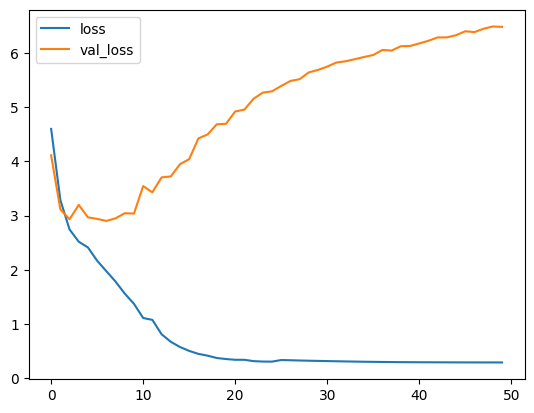

In [345]:
df_hist[["loss", "val_loss"]].plot()

<AxesSubplot: >

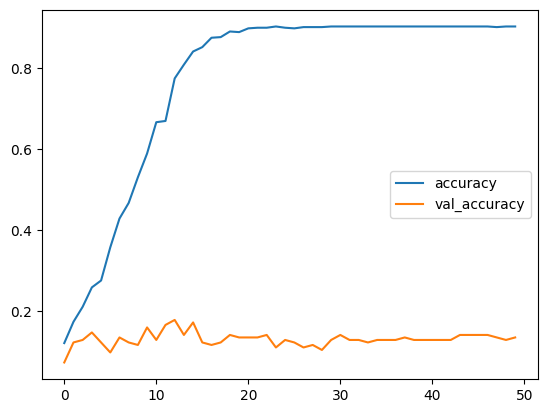

In [346]:
df_hist[["accuracy", "val_accuracy"]].plot()

# 왜 epoch가 늘어나도 val_accuracy 값이 고정인가????
* jpg랑 png, 확장자에 따라 다른 전처리를 하지 않음 -> 필요없는 것인가 내가 잘못 생각한 듯